
### Visualizing statistical relationships
Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

1. [Numerical Data Ploting](#one)
* relplot()
* scatterplot()
* lineplot()
2. [Categorical Data Ploting](#two)
* catplot()
* boxplot()
* stripplot()
* swarmplot()
* etc...
3. [Visualizing Distribution of the Data](#three)
* distplot()
* kdeplot()
* jointplot()
* rugplot()
4. [Linear Regression and Relationship](#four)
* regplot()
* lmplot()
5. [Controlling Ploted Figure Aesthetics](#five)
* figure styling
* axes styling
* color palettes
* etc..

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
%matplotlib inline

## [Section 1](#one)

Insert new line: 'B'   
Show function signature: Shift+Tab

https://www.youtube.com/watch?v=GcXcSZ0gQps

In [2]:
sns.set(style = 'darkgrid')

In [3]:
tips = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\tips5.csv')
tips.info() #summary stats
tips.head() #top 5
tips.tail() #bottom 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [5]:
dir(sns.FacetGrid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_inner_axes',
 '_left_axes',
 '_legend_out',
 '_margin_titles',
 '_not_bottom_axes',
 '_not_left_axes',
 '_update_legend_data',
 'add_legend',
 'ax',
 'despine',
 'facet_axis',
 'facet_data',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels']

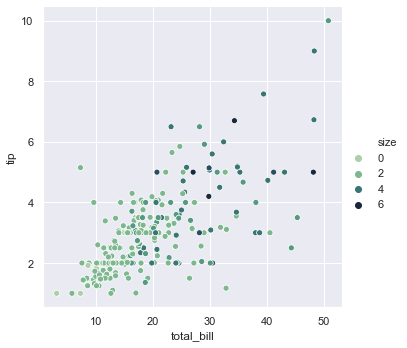

In [6]:
sns.relplot(x='total_bill', y='tip', hue = 'size', data=tips, palette = 'ch:r=-0.5, l=0.75')

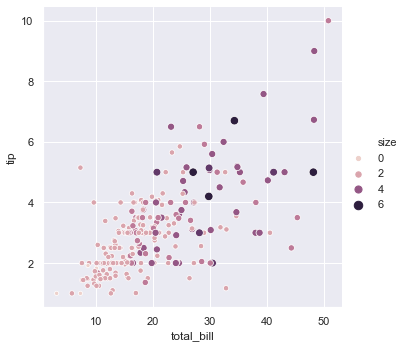

In [7]:
sns.relplot(x='total_bill', y='tip', hue = 'size', data=tips,  size = 'size')

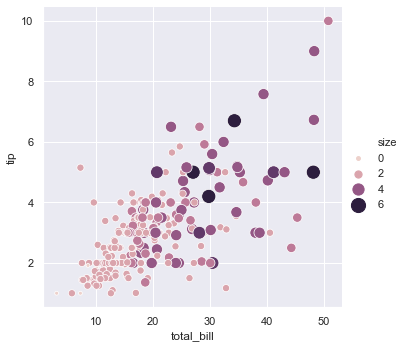

In [8]:
sns.relplot(x='total_bill', y='tip', hue = 'size', data=tips,  size = 'size', sizes = (15,200))

In [9]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))
df.head()


,time,value
0,0,-0.290892
1,1,-0.787863
2,2,-0.640367
3,3,-0.342191
4,4,0.051849


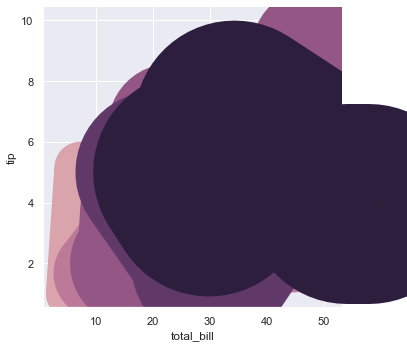

In [10]:
sns.relplot(x='total_bill', y='tip', hue = 'size', data=tips,  size = 'size', sizes = (15,200), kind='line')

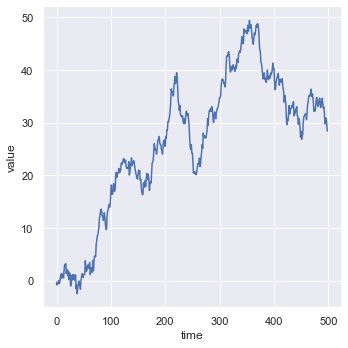

In [11]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)

In [12]:
df = pd.DataFrame(randn(500,2).cumsum(axis=0), columns = ['time', 'value'])
df.head()

,time,value
0,-0.319558,-0.620167
1,-1.939693,-0.153504
2,-1.897412,0.214964
3,-1.486732,-0.433800
4,-2.223845,0.312348


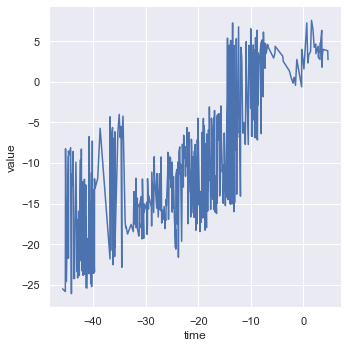

In [13]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

In [14]:
fmri = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\fmri.csv')
fmri.head()


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


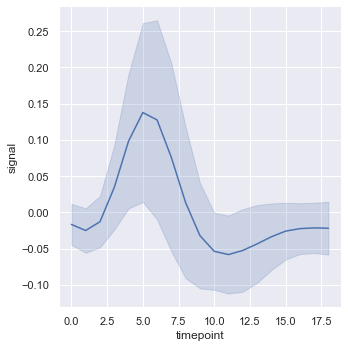

In [15]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = 'sd')
#ci = confidence interval, will shade 95%

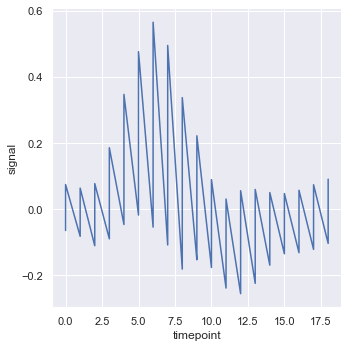

In [16]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, estimator = None)

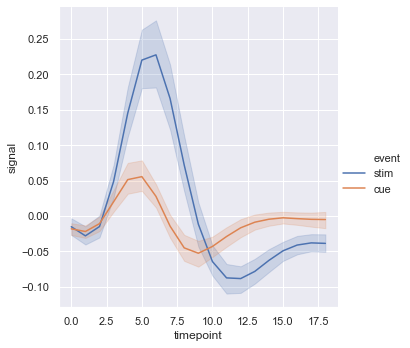

In [17]:
sns.relplot(x = 'timepoint', y='signal', hue='event', kind='line', data = fmri)

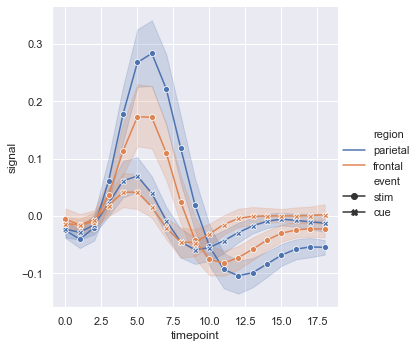

In [18]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', kind = 'line', style = 'event', data = fmri, markers = True, dashes = False)

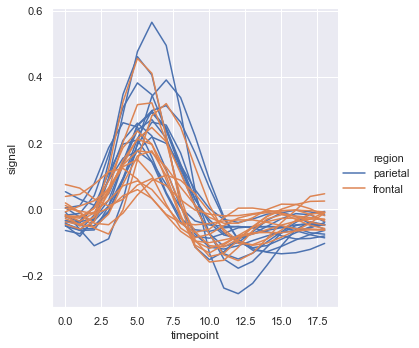

In [19]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region',units = 'subject', estimator = None, kind = 'line', data=fmri.query("event == 'stim'"))

In [20]:
dots = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\dots.csv').query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


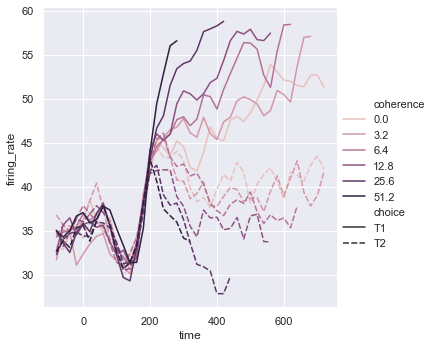

In [21]:
palette = sns.cubehelix_palette(light = 0.8, n_colors=6)
sns.relplot(x='time', y = 'firing_rate', hue = 'coherence', data=dots, kind='line', style= 'choice', palette = palette)

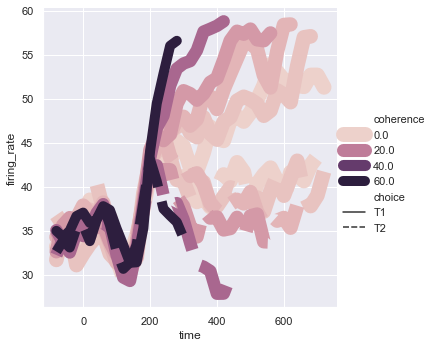

In [22]:
sns.relplot(x = 'time', y = 'firing_rate', size = 'coherence', style = 'choice', hue = 'coherence', kind = 'line', data=dots, sizes=(15,10))

In [23]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))
df.head()

,time,value
0,2019-06-02,-0.016620
1,2019-06-03,2.302528
2,2019-06-04,3.256814
3,2019-06-05,4.146315
4,2019-06-06,3.292203


In [ ]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate() ##That's what I need!

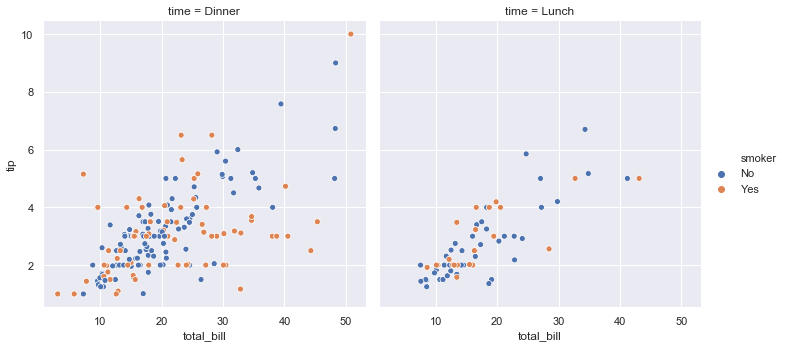

In [25]:
tips.head()
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data=tips)

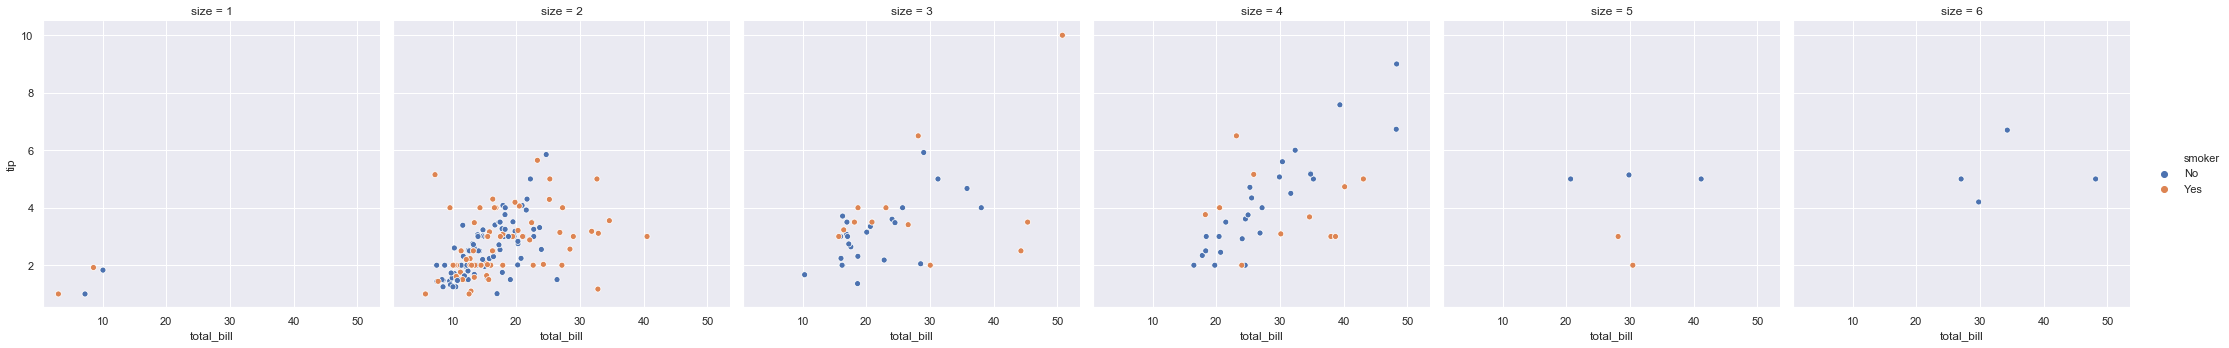

In [26]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data=tips)

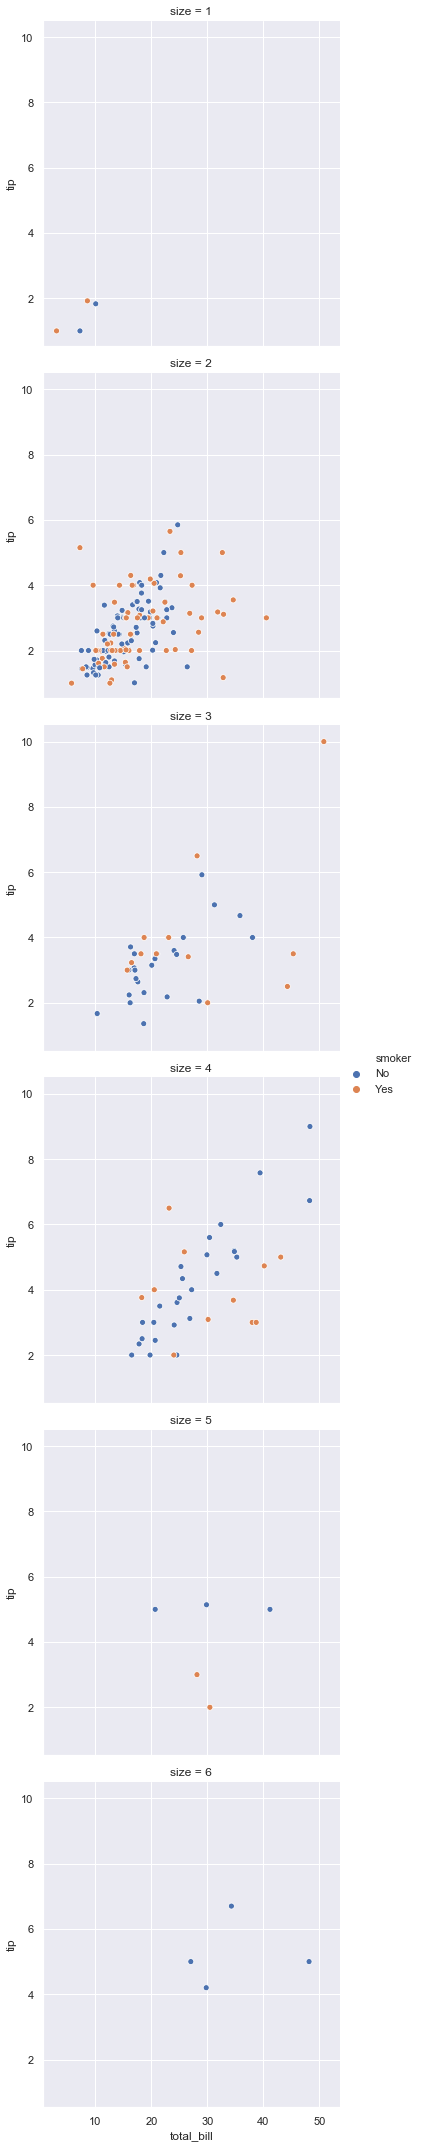

In [27]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', row = 'size', data=tips)

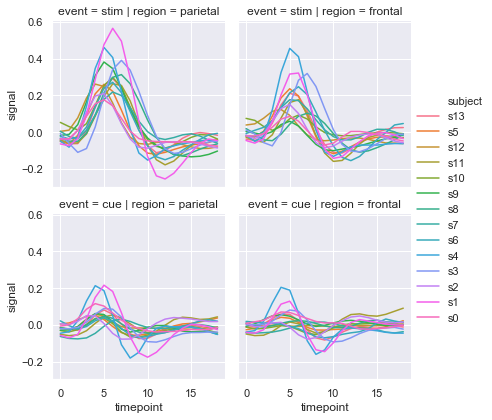

In [28]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region', row = 'event', height=3, kind = 'line', estimator = None, data=fmri)

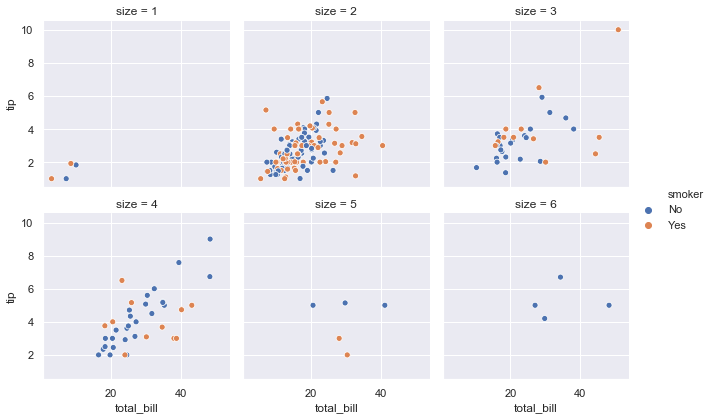

In [29]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data=tips, col_wrap=3, height=3)

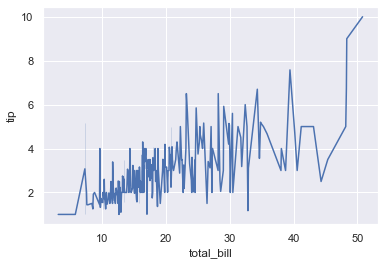

In [30]:
sns.lineplot(x = 'total_bill', y = 'tip', data=tips)

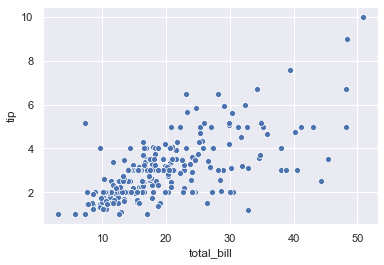

In [31]:
sns.scatterplot(x = 'total_bill', y = 'tip', data=tips)

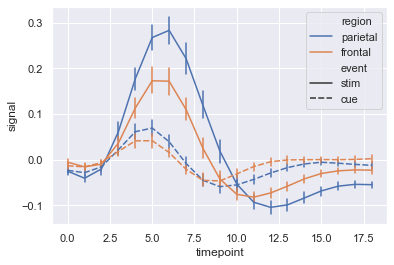

In [32]:
fmri.head()
sns.lineplot(x='timepoint', y='signal', data=fmri, style = 'event', hue = 'region', ci=68, err_style='bars')

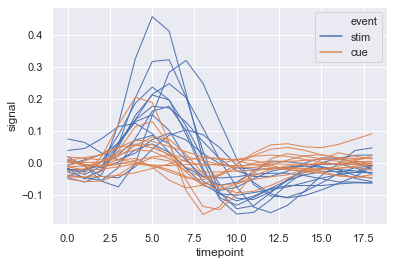

In [33]:
sns.lineplot(x='timepoint', y='signal', hue='event', units='subject', estimator=None, lw=1, data=fmri.query("region=='frontal'"))

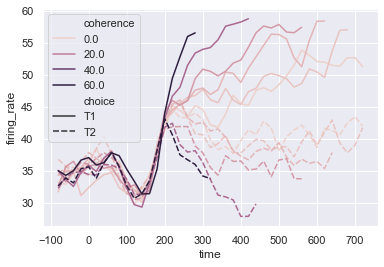

In [34]:
sns.lineplot(x = 'time', y = 'firing_rate', hue = 'coherence', style = 'choice', data = dots)

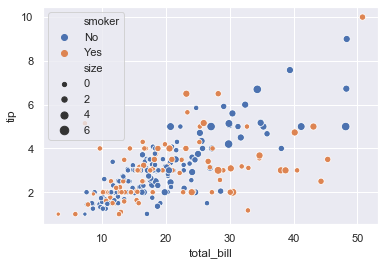

In [35]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size')

In [36]:
iris = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


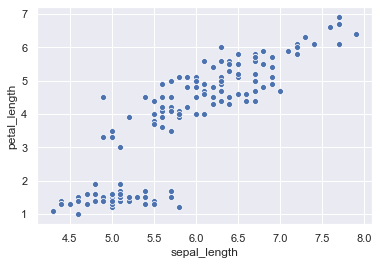

In [37]:
sns.scatterplot(x='sepal_length', y= 'petal_length', data=iris)

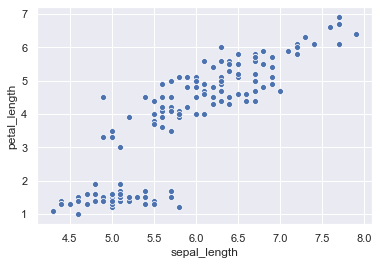

In [38]:
sns.scatterplot(x= iris['sepal_length'], y = iris['petal_length'])

## <a id='two'>Section 2 | Categorial plotting</a>

In [39]:
titanic = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\titanic.csv')

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


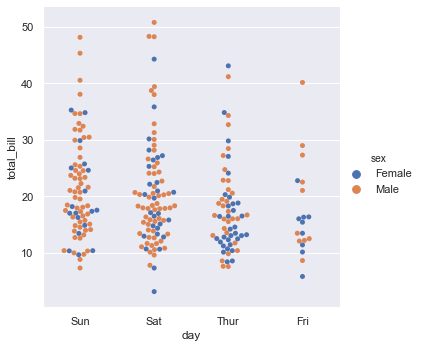

In [41]:
sns.catplot(x = 'day', y = 'total_bill', data=tips, kind='swarm', hue='sex' )#, jitter=False) #Jitter: Don't overlap dots

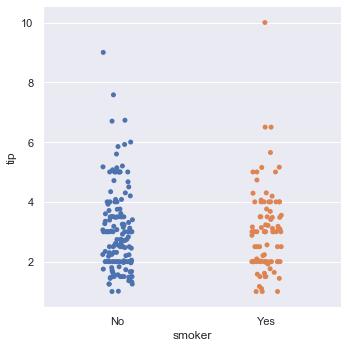

In [42]:
sns.catplot(x = 'smoker', y = 'tip', data=tips, order=['No', 'Yes'] )

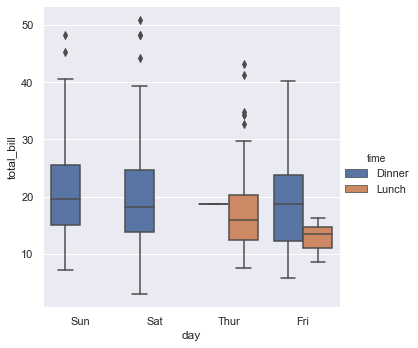

In [43]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips, hue='time')

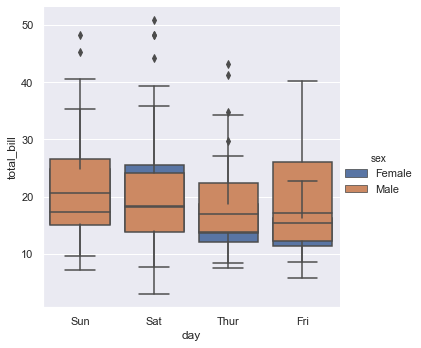

In [44]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips, hue='sex', dodge=False)

In [45]:
diamonds = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\diamonds.csv')

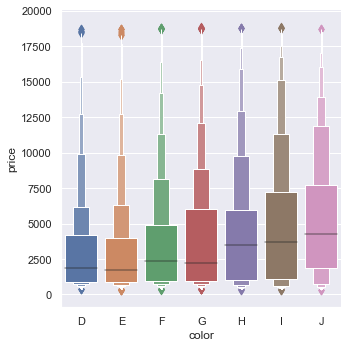

In [46]:
sns.catplot(x='color', y='price', kind='boxen', data=diamonds.sort_values('color'))

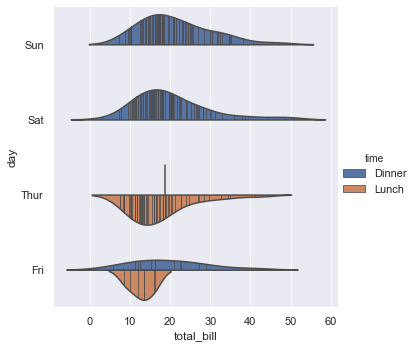

In [47]:
sns.catplot(x='total_bill', y = 'day', hue = 'time', kind='violin', data=tips, split=True, inner='stick')

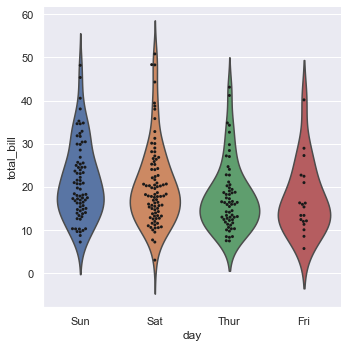

In [48]:
myGraph = sns.catplot(x = 'day', y = 'total_bill', kind='violin', inner=None, data=tips)
sns.swarmplot (x='day', y = 'total_bill', color='k', size=3, data=tips, ax = myGraph.ax)

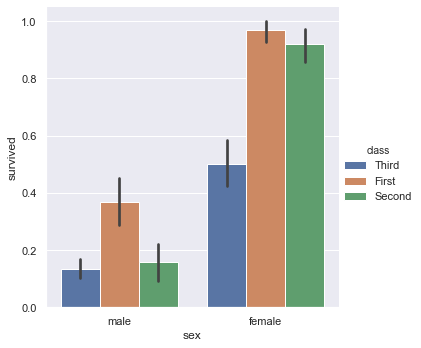

In [49]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic)

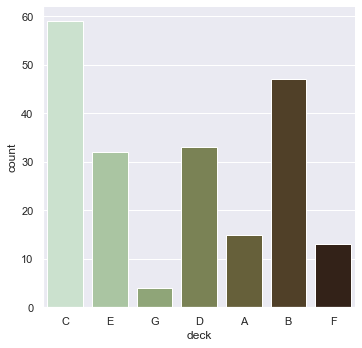

In [50]:
sns.catplot(x='deck',  kind='count', data=titanic, palette='ch:0.95')

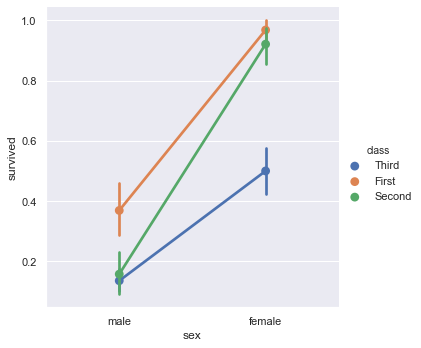

In [51]:
sns.catplot(x='sex',  y='survived', hue='class', kind='point', data=titanic)

### <a id='three'>Section 3 | Visualizing Distribution of the Data</a>

* distplot()
* kdeplot()
* jointplot()
* rugplot()

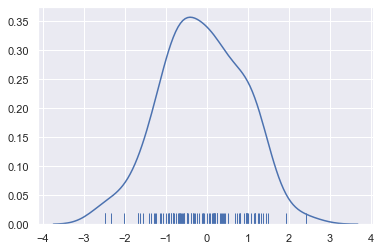

In [52]:
x = randn(100)
sns.distplot(x, kde=True, hist=False, rug=True, bins=30)

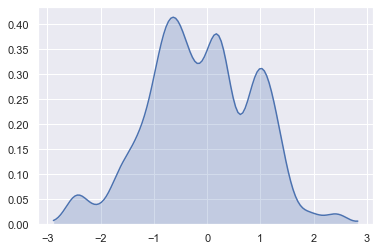

In [53]:
sns.kdeplot(x, shade=True, cbar=True, bw=0.2, cut=2)

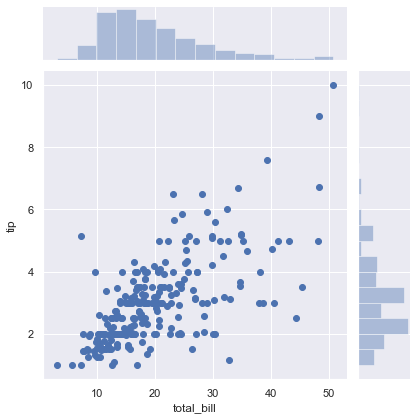

In [54]:
m = tips['total_bill']
n = tips['tip']

sns.jointplot(x = m, y = n)

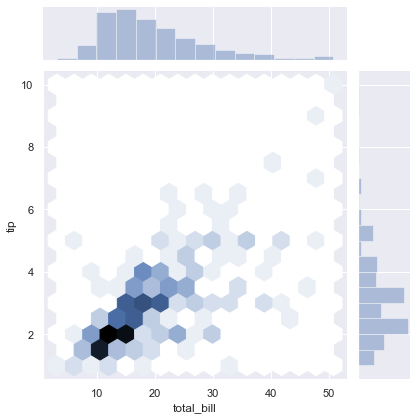

In [55]:
sns.axes_style('white')
sns.set()
sns.jointplot(x = m, y = n, kind='hex')

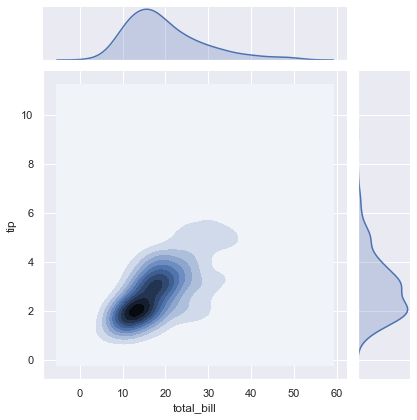

In [56]:
sns.jointplot(x = m, y = n, kind='kde')
#KDE = Kernel Density Estimate

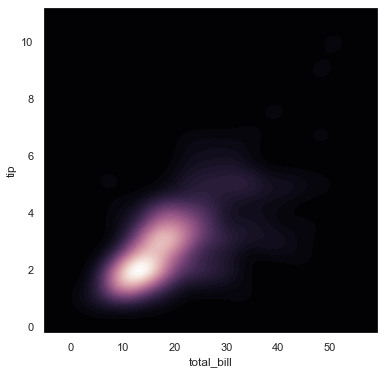

In [57]:
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark = 0, light = 1, reverse = True)
sns.kdeplot(m, n, cmap = cmap, n_levels=60, shade= True)

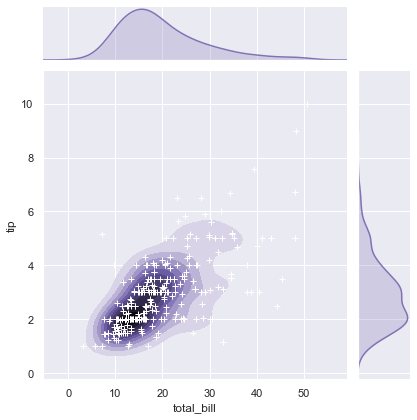

In [58]:
anotherGraph = sns.jointplot(m,n, kind = 'kde', color = 'm')
anotherGraph.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
anotherGraph.ax_joint.collections[0].set_alpha(0)

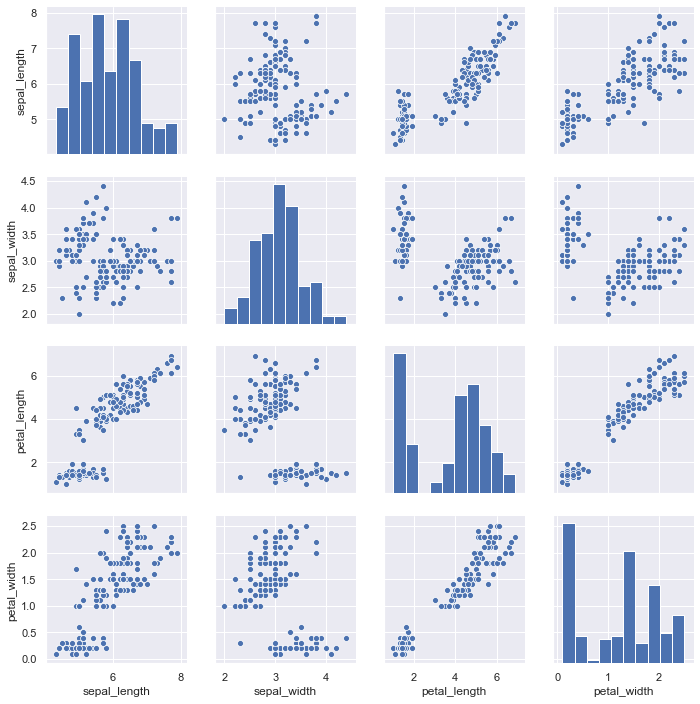

In [59]:
sns.pairplot(iris)

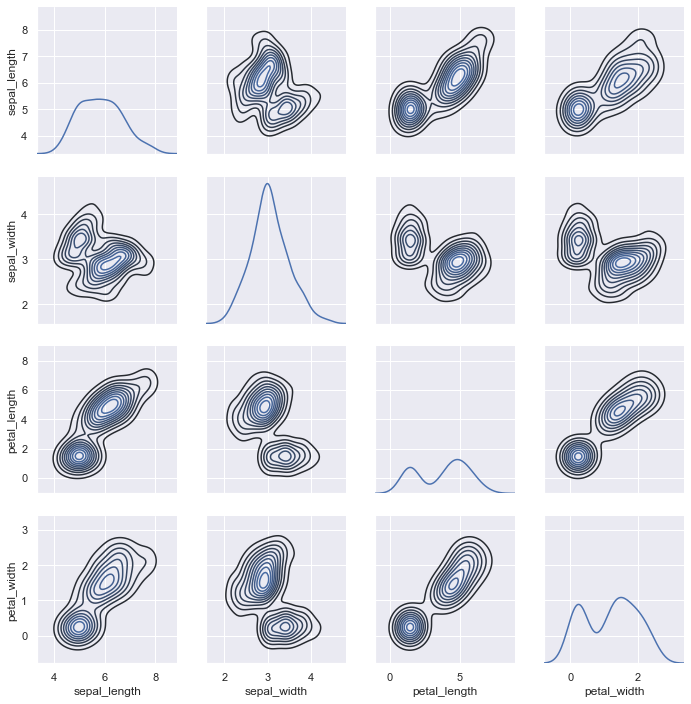

In [60]:
anotherGraph = sns.PairGrid(iris)
anotherGraph.map_diag(sns.kdeplot)
anotherGraph.map_offdiag(sns.kdeplot, n_levels = 10)

### <a id='four'>Section 4 | Linear Regression and Relationship</a>
* regplot()
* lmplot()

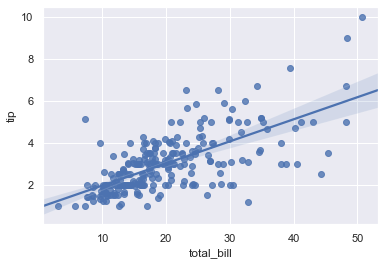

In [61]:
sns.regplot(x = 'total_bill', y = 'tip', data=tips)

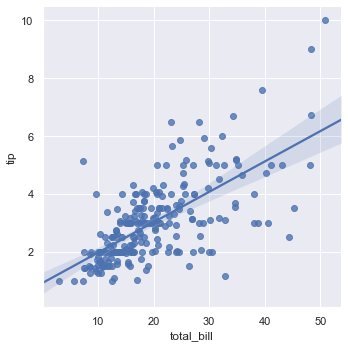

In [62]:
sns.lmplot(x = 'total_bill', y = 'tip', data=tips)

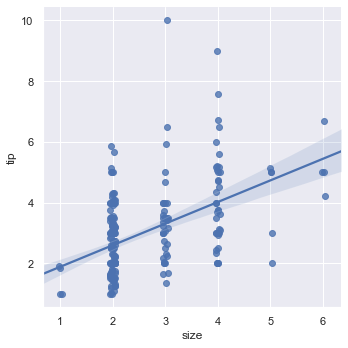

In [63]:
sns.lmplot(x = 'size', y = 'tip', data=tips, x_jitter = 0.05)

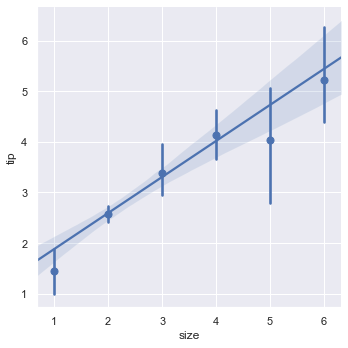

In [64]:
sns.lmplot(x = 'size', y = 'tip', data=tips, x_estimator= np.mean)

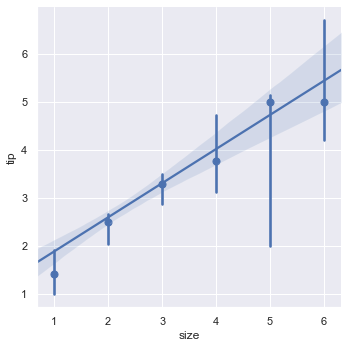

In [65]:
sns.lmplot(x = 'size', y = 'tip', data=tips, x_estimator= np.median)

In [66]:
anscombe = pd.read_csv('C:\\Users\\tscholz4\\seaborn\\anscombe.csv')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [67]:
anscombe['dataset'].value_counts()


II     11
IV     11
I      11
III    11
Name: dataset, dtype: int64

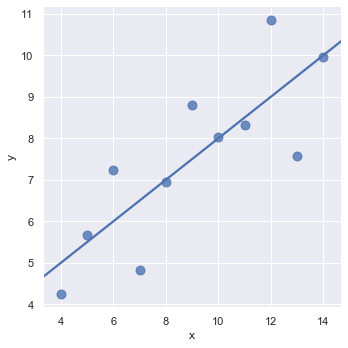

In [68]:
sns.lmplot(x = 'x', y = 'y', data = anscombe.query("dataset == 'I'"), ci = None, scatter_kws={'s' : 80})


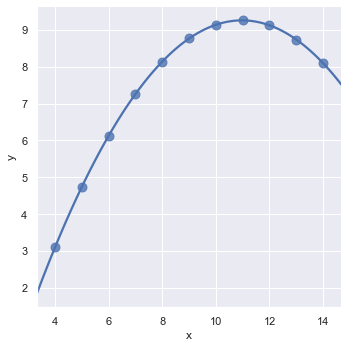

In [69]:
sns.lmplot(x = 'x', y = 'y', data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws={'s' : 80}, order = 2)

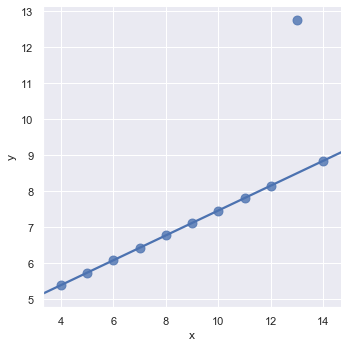

In [70]:

sns.lmplot(x = 'x', y = 'y', data = anscombe.query("dataset == 'III'"), ci = None, scatter_kws={'s' : 80}, robust = True)

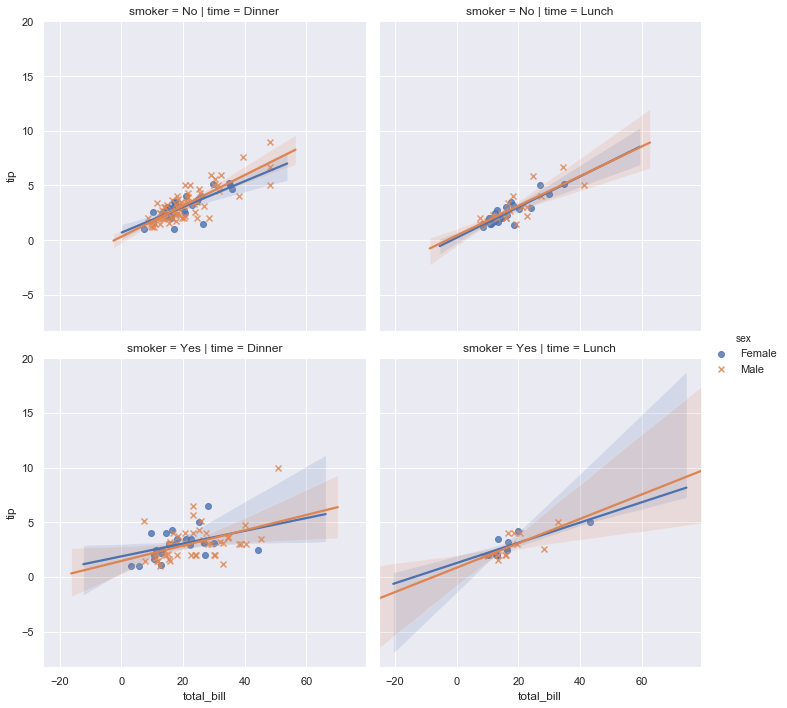

In [71]:

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers=['o', 'x'], col = 'time', row = 'smoker')

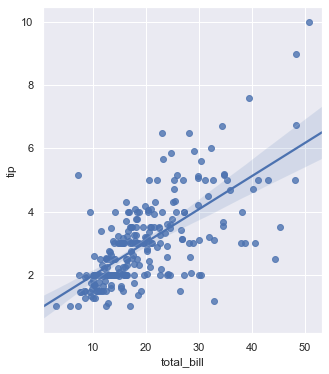

In [72]:
f, ax = plt.subplots(figsize = (5,6))
sns.regplot(x = 'total_bill', y = 'tip', data = tips,   ax = ax)

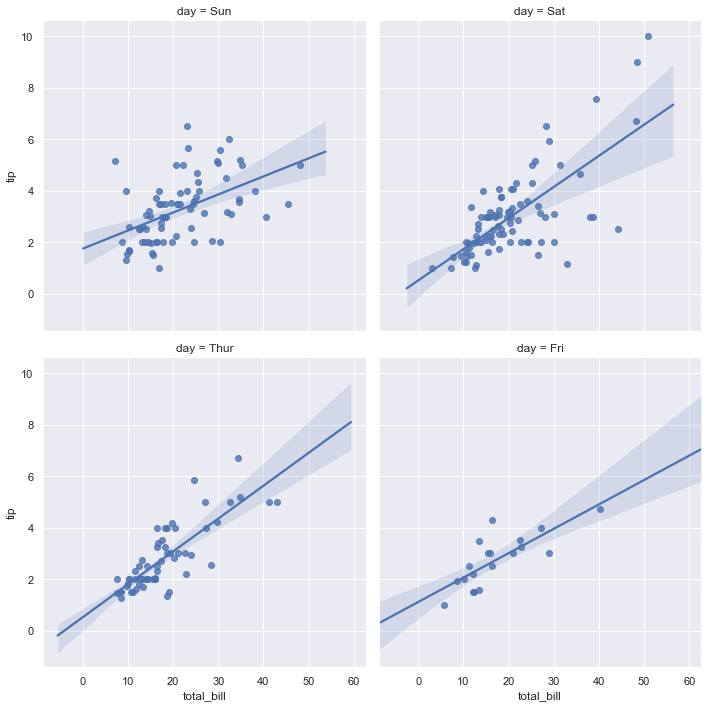

In [73]:
sns.lmplot(x = 'total_bill', y = 'tip', data=tips, col = 'day', col_wrap=2)

### <a id='five'>Section 5 | Controlling Ploted Figure Aestetics</a>
* figure styling 
* axes styling
* color palettes
* etc...

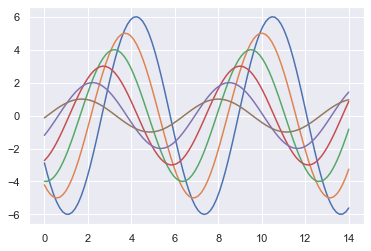

In [74]:
def sinplot(flip = 1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x, np.sin(x+i*0.5)*(7-i)*flip)
sinplot(-1)


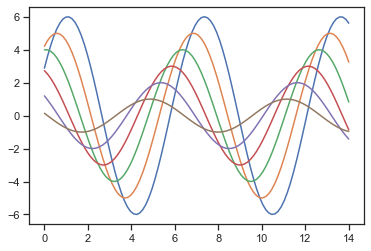

In [75]:
sns.set_style('ticks')
sinplot()

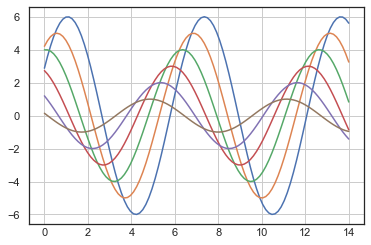

In [76]:
sns.set_style('white', {'axes.grid' : True, 'xtick.direction': 'in'})
sns.despine(left = True, bottom=True)
sinplot()

In [77]:
sns.axes_style() #Check style currently set

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'in',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

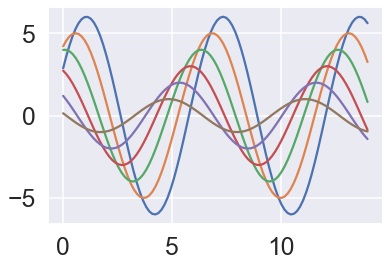

In [78]:
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.5)
sinplot()

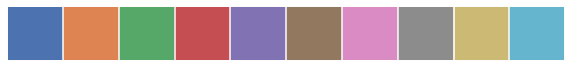

In [79]:
current_palettes = sns.color_palette()
sns.palplot(current_palettes)

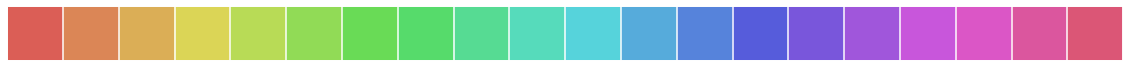

In [80]:
sns.palplot(sns.color_palette('hls', 20))

https://www.youtube.com/watch?v=GcXcSZ0gQps 2:13:07